In [207]:
from jqdata import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy
import talib as tl
from matplotlib import pyplot 

In [80]:
df = get_price('000300.XSHG',start_date='2020-01-01',end_date='2020-11-30',fields='close')
df.head()

,close
2020-01-02,4152.24
2020-01-03,4144.96
2020-01-06,4129.30
2020-01-07,4160.23
2020-01-08,4112.32


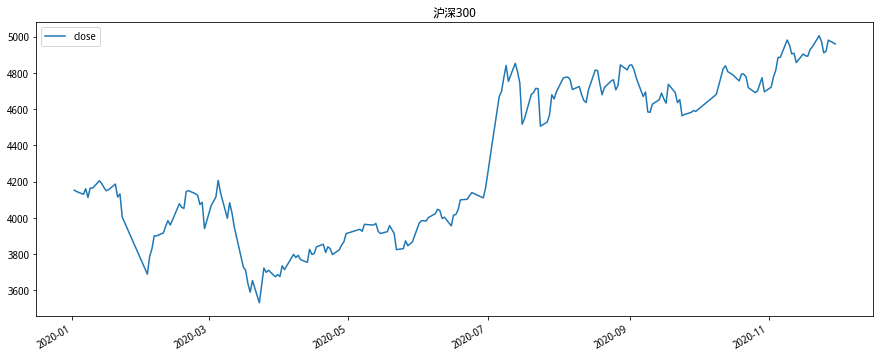

In [81]:
df.plot(figsize=(15,6),title='沪深300')

In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams

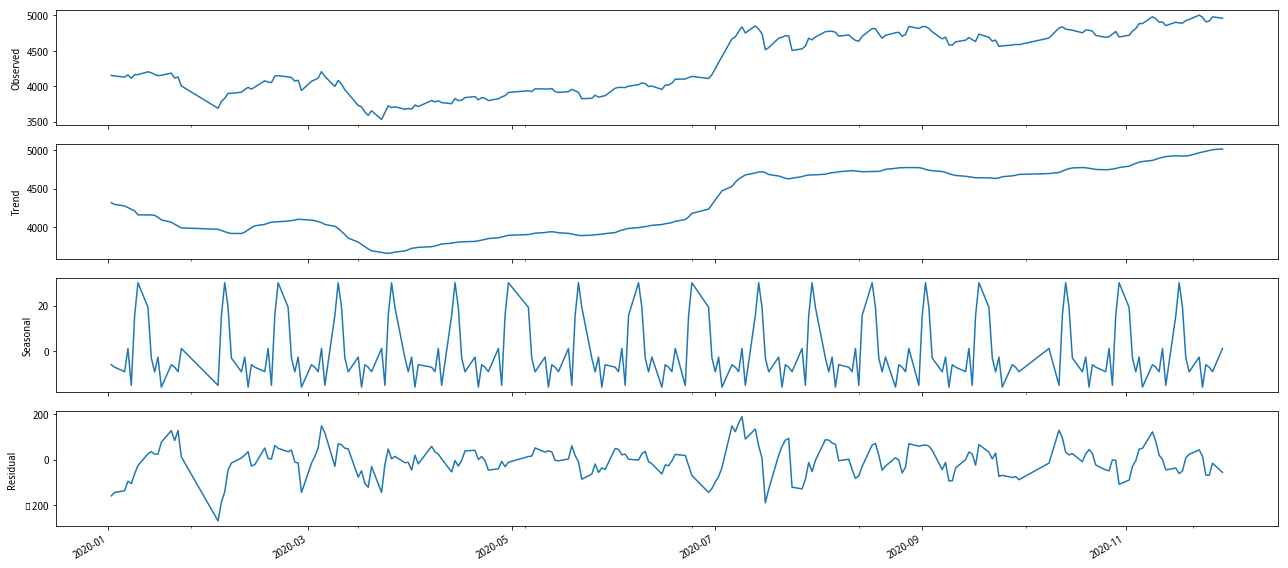

In [83]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive',freq=12, extrapolate_trend = 12)
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

In [84]:
df.index = pd.to_datetime(df.index)
df['day']=df.index.astype(long)
df.head()

,close,day
2020-01-02,4152.24,1577923200000000000
2020-01-03,4144.96,1578009600000000000
2020-01-06,4129.30,1578268800000000000
2020-01-07,4160.23,1578355200000000000
2020-01-08,4112.32,1578441600000000000


In [164]:
result = smf.ols(formula="close ~ day", data=df).fit()
df['predict2'] = result.predict(df[['day']])
print(result.params)

Intercept    1.702921e-33
day          2.711861e-15
dtype: float64


In [216]:
def lr(df):
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg.fit(df[['day']], df['close'])
    df['predict'] = reg.predict(df[['day']])
    #print(reg.coef_,reg.intercept_)
    #df[['close','predict']].plot(figsize=(15,4),title='沪深300')
    return reg

[4.2342829301248664e-14] -63111.376520565274


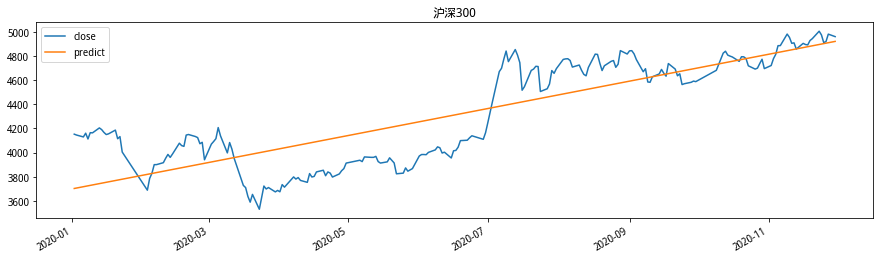

In [166]:
lr(df.copy())

In [203]:
lr(df.iloc[-10:].copy())

[5.4129817734654164e-14] -81996.03263189839


[7.64551579151807e-14] -117844.70426235082


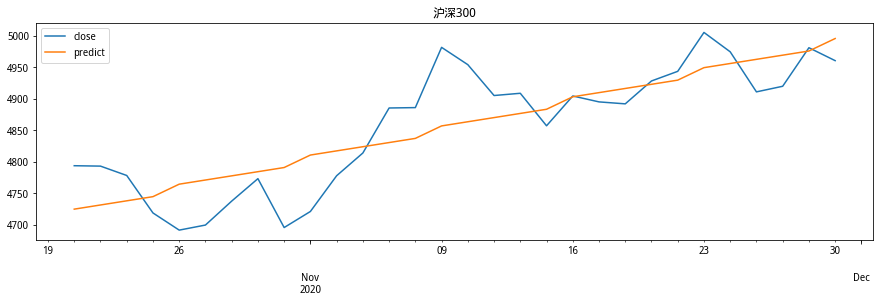

In [173]:
lr(df.iloc[-30:].copy())

[4.514602975638675e-14] -67542.90509269155


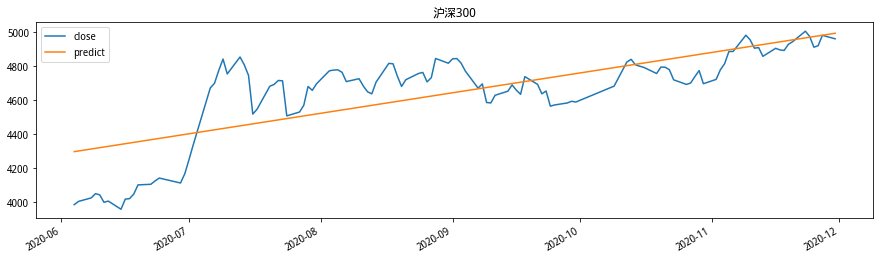

In [177]:
lr(df.iloc[-120:].copy())

[-4.811679822808421e-13] 766082.4525419667


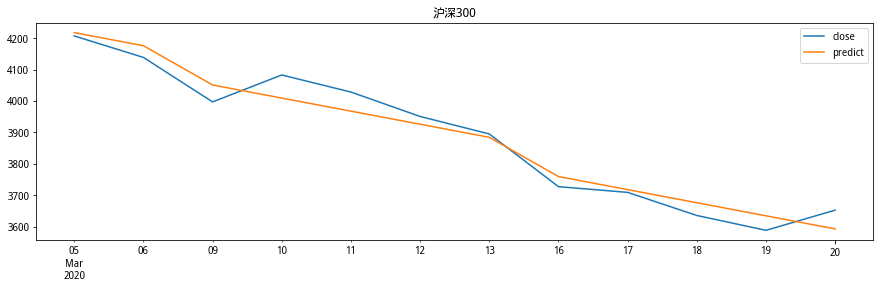

In [181]:
lr(df.loc['20200305':'20200322'].copy())

[6.238800860719875e-13] -989869.443943662


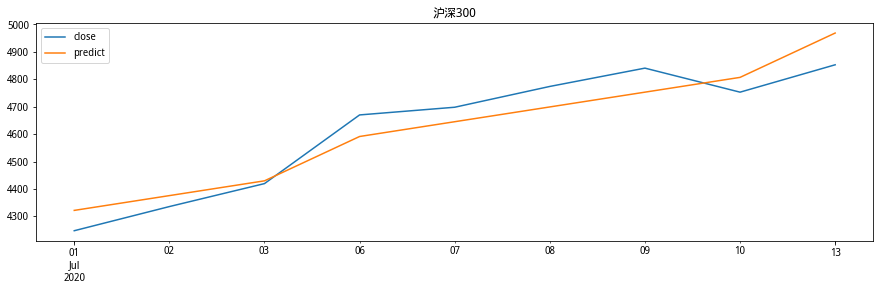

In [186]:
lr(df.loc['20200701':'20200713'].copy())

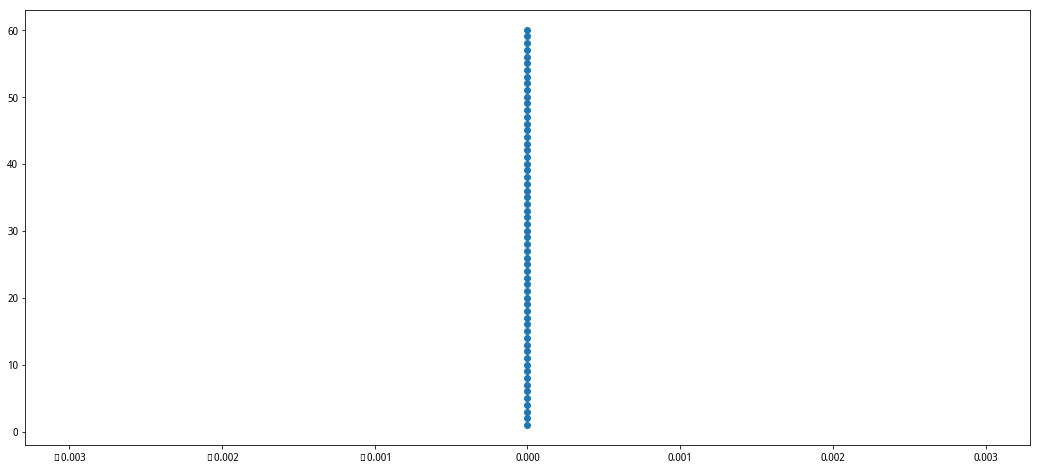

In [248]:
coefs = []
index = []
for i in range(60, 0, -1):
    r = lr(df.iloc[-i:].copy())
    coefs.append(r.coef_[0])
    index.append(i)
pyplot.scatter(coefs, index)    